# Logistic Regression With PyTorch

## About Logistic Regression

### Logistic Regression Basics

*** Classification Algorithm ***

* Example : Spam Vs Not Spam
    * Input : Bunch of words
    * Output : Probability spam or not
    
*** Basic Comparison ***

* Linear Regression
    * Output : Numeric Value given inputs
* Logistic Regression
    * Output : probability [0,1] given input belonging to a class

*** Input/Output comparison ***

*** - Linear Regression Multiplication ***
    * input :[1]
        * Output :[2]
    
    * input :[2]
        * Output : [4]
* Here we are trying to model the relationship  y=2x

*** - Logistic Regression Spam ***
    * p: probability it's spam

    * Input : 'Sign up to get 1 million tonight'
        * Output p = 0.8
    * Input : 'This is the receipt from your recent purchase from flipkart'
        * Output p = 0.3

#### Problems of Linear Regresssion

* Example 
    * Fever 
    * Input : temperature
    * Output : ferver or no fever 
    
* Remember 
    * Linear regression : minimize error between points and line

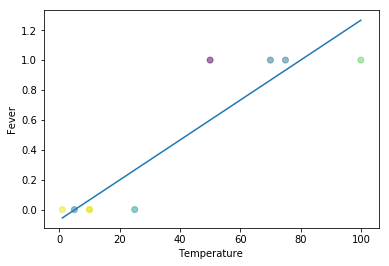

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1 ,5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]

colors = np.random.rand(len(x))
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature ")
plt.scatter(x,y , c=colors ,alpha =0.5)
plt.show()

*** Linear Regression Probelm 1 ***

Fever value can go negative(below 0) and positive(above 1)

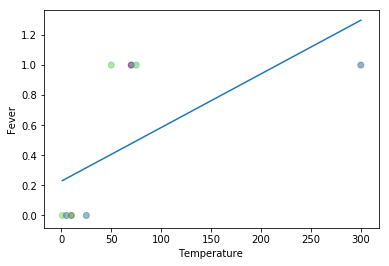

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [1 ,5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]

colors = np.random.rand(len(x))
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature ")
plt.scatter(x,y , c=colors ,alpha =0.5)
plt.show()

*** Linear Regression Probelm 1 ***

Fever points not predicted with outliers

In [5]:
from IPython.display import display, Math, Latex

# Logistic Regression In-Depth 

*** Predicting Probability ***

* Linear Regresion Doesn't work
* Instead of predicting direct values : predict probability

![LogisticReg](log.jpg)

*** Logistic Function g()***

* Two class logistic regression
* y = Ax+b
* g(y) = $ \frac{1}{1+e^{-y}} =\frac{1}{1+e^{(Ax+b)}}  $
* g(y) = Estimated probability that y=1 given x

*** Softmax Function g()***

* Multi-Class logistic regression
* Generalization of logistic function

*** Cross Entry Function D() ***

* $ D(S,L) = LlogS-(1-L)log(1-S)$
    * If L = 0 (label)
        * $ D(S,0)= -log(1-S) $
            * $ -log(1-S) $: less positive if $S$ ---> 0  
            * $ -log(1-S) $: more positive if $S$ ---> 1 (BIGGER LOSS)
            
    * If L = 1 (label)
        * $ D(S,1)= LogS $
            * $ LogS $: less negative if $S$ ---> 0  
            * $ LogS $: more negative if $S$ ---> 1 (BIGGER LOSS)

In [6]:
import math
print(-math.log(1-0.00001))
print(-math.log(1-0.99999))

print(math.log(0.99999))
print(math.log(0.00001))


1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


*** Cross Entropy Loss L***-

* Goal : Minimizing Cross Entropy Loss
* $L = \frac{1}{N}\sum_i D(g(A_{x}+b),L_{i}) $

# Building A Logistic Regression Model With PyTorch

##### Steps
* Step 1: Load Dataset
* Step 2: Make Dataset iterable
* Step 3: Make Model Class
* Step 4: Instantiate Model Class
* Step 5: Instantiate Loss Class
* Step 6: Instantiate Optimizer Class
* Step 7: Instantiate Train Model

#### Step 1 : Loading MNIST Train Dataset
*** Images from 1 to 9 ***

In [7]:
#importing dependencies
import torch
import torch.nn as nn
import torchvision.transforms as transforms 
import torchvision.datasets as dsets 
from torch.autograd import Variable 

In [9]:
# create the train and tets dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


In [52]:
len(train_dataset)

60000

In [53]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [54]:
type(train_dataset[0])

tuple

In [55]:
# input matrix 
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [56]:
# label
train_dataset[0][1]

tensor(5)

*** Displaying MNIST *** 



In [57]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

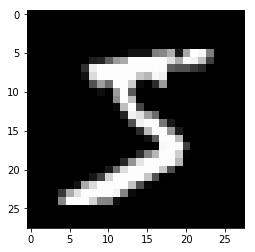

In [59]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

In [60]:
# checking label
train_dataset[0][1]

tensor(5)

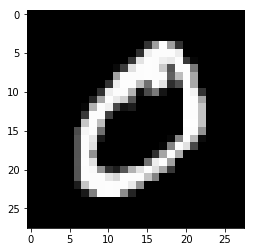

In [61]:
# let's try another
show_img = train_dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

In [62]:
#label
train_dataset[1][1]

tensor(0)

#### Test Dataset

In [63]:
len(test_dataset)

10000

In [64]:
type(test_dataset[0])

tuple

In [65]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

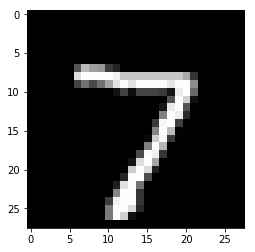

In [66]:
# test
show_img = test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

In [67]:
# checking label
test_dataset[0][1]

tensor(7)

#### Step 2 : Make Dataset Iterable

* Aim : Make the datset iterable
* Total Data : 60,000 
* Minibatch : 100
    * Number of examples in 1 iteration
* Iteration: 3000
    * 1 Iteration : one mini batch forward & backward-pass
   
* Epochs
    * 1 Epoch : Running through the whole dataset once
    * $ \ epochs = iterations\div\frac{totaldata}{minibatch}=3000 \div \frac{60000}{100} = 5\ $


In [68]:
len(train_dataset)

60000

In [69]:
batch_size = 100

In [73]:
n_iters = 3000

In [74]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [75]:
num_epochs

5

#### Create iterable objects : Training Dataset

In [76]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

#### Check iterability 

In [77]:
import collections
isinstance (train_loader,collections.Iterable)
# return true if it's iterable, return false if its not iterable

True

#### Create iterable objects : Testing Dataset

In [78]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# check iterability
isinstance (test_loader,collections.Iterable)

True

#### Main Aim: Iterate through the dataset

In [80]:
img_1 = np.ones((28,28))
img_2 = np.ones((28,28))

lst = [img_1,img_2]



In [82]:
# Need to iterate
# Let's think of it as an image

for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


#### Step 3 : Building Model

In [83]:
# Building the model # same as linear regression 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        out = self.linear(x)
        return out

#### Step 4 :  Instantiate Model Class

* Input Dimension :
    * Size of image
    * 28*28 = 784
* Output Dimension : 10
    * 0,1,2,3,4,5,6,7,8,9

In [86]:
#size of the images

train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [87]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#### Step 5 :  Instantiate Loss Class

* Logistic Regression : Cross Entropy Loss

In [88]:
criterion = nn.CrossEntropyLoss()

*** What happens in nn.CrossEntropyLoss() *** 

* Computes softmax(logistic/softmax function)
* Computes cross entropy

#### STEP 6: INSTANTIATE OPTIMIZER CLASS

#### Instantiate Optimizer Class

* Simplified Equation :$\Theta = \Theta -\eta .*\bigtriangledown _{\Theta }$
    * $\Theta$ : parameter(Our Variables)
    * $\eta$ : learning rate
    * $\bigtriangledown _{\Theta }$ : parameter's gradients
    
* Even Simpler equation:
    * parameters  = parameters-learning_rate * parameter_gradients
    * At every iteration , we update our model parameters
    

In [89]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Parameters In-Depth

In [93]:
print(model.parameters())

print(len(list(model.parameters())))

# FC1 Parameters
print(list(model.parameters())[0].size())

# FC2 Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x00000214085312B0>
2
torch.Size([10, 784])
torch.Size([10])


#### STEP 7: TRAIN THE MODEL

* Process
    1. Convert input/labels to variables
    2. Clear gradient buffets
    3. Get Output given inputs
    4. Get loss
    5. Get gradient w.r.t to parameters
    6. update parameters using gradients
        * parameters = parameters-learning_rate * parameter_gradients
    7. Repeat

In [94]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
    
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
    
        
        print('Iteration: {}. Loss: {} '.format(iter, loss.data[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 1. Loss: 2.3525338172912598 
Iteration: 2. Loss: 2.348985433578491 
Iteration: 3. Loss: 2.2768068313598633 
Iteration: 4. Loss: 2.3310117721557617 
Iteration: 5. Loss: 2.314495325088501 
Iteration: 6. Loss: 2.3247199058532715 
Iteration: 7. Loss: 2.3429088592529297 
Iteration: 8. Loss: 2.3038530349731445 
Iteration: 9. Loss: 2.3187692165374756 
Iteration: 10. Loss: 2.341754913330078 
Iteration: 11. Loss: 2.341477632522583 
Iteration: 12. Loss: 2.3177871704101562 
Iteration: 13. Loss: 2.3168540000915527 
Iteration: 14. Loss: 2.3244564533233643 
Iteration: 15. Loss: 2.3124876022338867 
Iteration: 16. Loss: 2.3459393978118896 
Iteration: 17. Loss: 2.306161880493164 
Iteration: 18. Loss: 2.292889356613159 
Iteration: 19. Loss: 2.293450355529785 
Iteration: 20. Loss: 2.2930209636688232 
Iteration: 21. Loss: 2.297396421432495 
Iteration: 22. Loss: 2.285226345062256 
Iteration: 23. Loss: 2.3198423385620117 
Iteration: 24. Loss: 2.30489444732666 
Iteration: 25. Loss: 2.2981402873992

Iteration: 201. Loss: 2.1084706783294678 
Iteration: 202. Loss: 2.1044504642486572 
Iteration: 203. Loss: 2.12017822265625 
Iteration: 204. Loss: 2.125405788421631 
Iteration: 205. Loss: 2.098329782485962 
Iteration: 206. Loss: 2.111501455307007 
Iteration: 207. Loss: 2.1259233951568604 
Iteration: 208. Loss: 2.113164186477661 
Iteration: 209. Loss: 2.1181282997131348 
Iteration: 210. Loss: 2.099489688873291 
Iteration: 211. Loss: 2.119657516479492 
Iteration: 212. Loss: 2.0899267196655273 
Iteration: 213. Loss: 2.104435682296753 
Iteration: 214. Loss: 2.0891735553741455 
Iteration: 215. Loss: 2.1229751110076904 
Iteration: 216. Loss: 2.1111249923706055 
Iteration: 217. Loss: 2.1073427200317383 
Iteration: 218. Loss: 2.093324661254883 
Iteration: 219. Loss: 2.104048728942871 
Iteration: 220. Loss: 2.1089649200439453 
Iteration: 221. Loss: 2.079092502593994 
Iteration: 222. Loss: 2.0961503982543945 
Iteration: 223. Loss: 2.0825626850128174 
Iteration: 224. Loss: 2.098996162414551 
Itera

Iteration: 397. Loss: 1.950493335723877 
Iteration: 398. Loss: 1.9251339435577393 
Iteration: 399. Loss: 1.9680157899856567 
Iteration: 400. Loss: 1.9683815240859985 
Iteration: 401. Loss: 1.9380422830581665 
Iteration: 402. Loss: 1.930470585823059 
Iteration: 403. Loss: 1.9594213962554932 
Iteration: 404. Loss: 1.9457390308380127 
Iteration: 405. Loss: 1.9504719972610474 
Iteration: 406. Loss: 1.9792784452438354 
Iteration: 407. Loss: 1.9489399194717407 
Iteration: 408. Loss: 1.9632524251937866 
Iteration: 409. Loss: 1.9199154376983643 
Iteration: 410. Loss: 1.9382704496383667 
Iteration: 411. Loss: 1.9651957750320435 
Iteration: 412. Loss: 1.9260274171829224 
Iteration: 413. Loss: 1.9568748474121094 
Iteration: 414. Loss: 1.9575752019882202 
Iteration: 415. Loss: 1.9564698934555054 
Iteration: 416. Loss: 1.9218450784683228 
Iteration: 417. Loss: 1.941413402557373 
Iteration: 418. Loss: 1.9182183742523193 
Iteration: 419. Loss: 1.9628018140792847 
Iteration: 420. Loss: 1.9350236654281

Iteration: 593. Loss: 1.7730008363723755 
Iteration: 594. Loss: 1.8095098733901978 
Iteration: 595. Loss: 1.7886381149291992 
Iteration: 596. Loss: 1.8452180624008179 
Iteration: 597. Loss: 1.8093093633651733 
Iteration: 598. Loss: 1.8076916933059692 
Iteration: 599. Loss: 1.8489094972610474 
Iteration: 600. Loss: 1.7659666538238525 
Iteration: 601. Loss: 1.8282470703125 
Iteration: 602. Loss: 1.7988462448120117 
Iteration: 603. Loss: 1.871422290802002 
Iteration: 604. Loss: 1.7504616975784302 
Iteration: 605. Loss: 1.7723450660705566 
Iteration: 606. Loss: 1.8199061155319214 
Iteration: 607. Loss: 1.7961925268173218 
Iteration: 608. Loss: 1.7323939800262451 
Iteration: 609. Loss: 1.8093081712722778 
Iteration: 610. Loss: 1.8296630382537842 
Iteration: 611. Loss: 1.7784936428070068 
Iteration: 612. Loss: 1.7185752391815186 
Iteration: 613. Loss: 1.773566484451294 
Iteration: 614. Loss: 1.804080605506897 
Iteration: 615. Loss: 1.7680031061172485 
Iteration: 616. Loss: 1.7671741247177124

Iteration: 789. Loss: 1.5974308252334595 
Iteration: 790. Loss: 1.723865032196045 
Iteration: 791. Loss: 1.6741849184036255 
Iteration: 792. Loss: 1.7250269651412964 
Iteration: 793. Loss: 1.6607288122177124 
Iteration: 794. Loss: 1.6639024019241333 
Iteration: 795. Loss: 1.6293072700500488 
Iteration: 796. Loss: 1.6821627616882324 
Iteration: 797. Loss: 1.6723045110702515 
Iteration: 798. Loss: 1.7023082971572876 
Iteration: 799. Loss: 1.625656008720398 
Iteration: 800. Loss: 1.6372276544570923 
Iteration: 801. Loss: 1.6740310192108154 
Iteration: 802. Loss: 1.6823914051055908 
Iteration: 803. Loss: 1.6960493326187134 
Iteration: 804. Loss: 1.684924602508545 
Iteration: 805. Loss: 1.6761441230773926 
Iteration: 806. Loss: 1.6576277017593384 
Iteration: 807. Loss: 1.6545939445495605 
Iteration: 808. Loss: 1.6469833850860596 
Iteration: 809. Loss: 1.6613688468933105 
Iteration: 810. Loss: 1.630854606628418 
Iteration: 811. Loss: 1.6146131753921509 
Iteration: 812. Loss: 1.63201260566711

Iteration: 985. Loss: 1.557947039604187 
Iteration: 986. Loss: 1.5489091873168945 
Iteration: 987. Loss: 1.5116055011749268 
Iteration: 988. Loss: 1.5588123798370361 
Iteration: 989. Loss: 1.5546764135360718 
Iteration: 990. Loss: 1.5522894859313965 
Iteration: 991. Loss: 1.607147216796875 
Iteration: 992. Loss: 1.6087623834609985 
Iteration: 993. Loss: 1.5396357774734497 
Iteration: 994. Loss: 1.5928272008895874 
Iteration: 995. Loss: 1.5552982091903687 
Iteration: 996. Loss: 1.5901129245758057 
Iteration: 997. Loss: 1.5962977409362793 
Iteration: 998. Loss: 1.576180100440979 
Iteration: 999. Loss: 1.5526649951934814 
Iteration: 1000. Loss: 1.5265874862670898 
Iteration: 1001. Loss: 1.5821928977966309 
Iteration: 1002. Loss: 1.5591440200805664 
Iteration: 1003. Loss: 1.5226805210113525 
Iteration: 1004. Loss: 1.6445045471191406 
Iteration: 1005. Loss: 1.5722312927246094 
Iteration: 1006. Loss: 1.5793713331222534 
Iteration: 1007. Loss: 1.5292729139328003 
Iteration: 1008. Loss: 1.5803

Iteration: 1176. Loss: 1.4693888425827026 
Iteration: 1177. Loss: 1.495317816734314 
Iteration: 1178. Loss: 1.4661619663238525 
Iteration: 1179. Loss: 1.5266985893249512 
Iteration: 1180. Loss: 1.508236289024353 
Iteration: 1181. Loss: 1.5418422222137451 
Iteration: 1182. Loss: 1.4782496690750122 
Iteration: 1183. Loss: 1.4664665460586548 
Iteration: 1184. Loss: 1.4230051040649414 
Iteration: 1185. Loss: 1.4671907424926758 
Iteration: 1186. Loss: 1.4813103675842285 
Iteration: 1187. Loss: 1.4496971368789673 
Iteration: 1188. Loss: 1.4928609132766724 
Iteration: 1189. Loss: 1.3665189743041992 
Iteration: 1190. Loss: 1.4422569274902344 
Iteration: 1191. Loss: 1.4624457359313965 
Iteration: 1192. Loss: 1.3880314826965332 
Iteration: 1193. Loss: 1.457821249961853 
Iteration: 1194. Loss: 1.4219489097595215 
Iteration: 1195. Loss: 1.4254831075668335 
Iteration: 1196. Loss: 1.5063984394073486 
Iteration: 1197. Loss: 1.4703642129898071 
Iteration: 1198. Loss: 1.4693100452423096 
Iteration: 119

Iteration: 1367. Loss: 1.3401989936828613 
Iteration: 1368. Loss: 1.4251551628112793 
Iteration: 1369. Loss: 1.4651951789855957 
Iteration: 1370. Loss: 1.377311110496521 
Iteration: 1371. Loss: 1.382981300354004 
Iteration: 1372. Loss: 1.4423795938491821 
Iteration: 1373. Loss: 1.3887022733688354 
Iteration: 1374. Loss: 1.3711949586868286 
Iteration: 1375. Loss: 1.361975073814392 
Iteration: 1376. Loss: 1.426649808883667 
Iteration: 1377. Loss: 1.3731622695922852 
Iteration: 1378. Loss: 1.4118481874465942 
Iteration: 1379. Loss: 1.4064892530441284 
Iteration: 1380. Loss: 1.4367725849151611 
Iteration: 1381. Loss: 1.3194184303283691 
Iteration: 1382. Loss: 1.4622400999069214 
Iteration: 1383. Loss: 1.4290410280227661 
Iteration: 1384. Loss: 1.3854436874389648 
Iteration: 1385. Loss: 1.3615096807479858 
Iteration: 1386. Loss: 1.4226348400115967 
Iteration: 1387. Loss: 1.3995441198349 
Iteration: 1388. Loss: 1.3755123615264893 
Iteration: 1389. Loss: 1.451098918914795 
Iteration: 1390. Lo

Iteration: 1558. Loss: 1.324836015701294 
Iteration: 1559. Loss: 1.2727514505386353 
Iteration: 1560. Loss: 1.2767077684402466 
Iteration: 1561. Loss: 1.4010391235351562 
Iteration: 1562. Loss: 1.364791989326477 
Iteration: 1563. Loss: 1.368595838546753 
Iteration: 1564. Loss: 1.3010191917419434 
Iteration: 1565. Loss: 1.3338720798492432 
Iteration: 1566. Loss: 1.3367886543273926 
Iteration: 1567. Loss: 1.30855393409729 
Iteration: 1568. Loss: 1.2978260517120361 
Iteration: 1569. Loss: 1.2701377868652344 
Iteration: 1570. Loss: 1.3605152368545532 
Iteration: 1571. Loss: 1.241385579109192 
Iteration: 1572. Loss: 1.3674225807189941 
Iteration: 1573. Loss: 1.3065265417099 
Iteration: 1574. Loss: 1.329389214515686 
Iteration: 1575. Loss: 1.2835055589675903 
Iteration: 1576. Loss: 1.2785749435424805 
Iteration: 1577. Loss: 1.3439421653747559 
Iteration: 1578. Loss: 1.3558653593063354 
Iteration: 1579. Loss: 1.3360633850097656 
Iteration: 1580. Loss: 1.3509331941604614 
Iteration: 1581. Loss

Iteration: 1749. Loss: 1.3164271116256714 
Iteration: 1750. Loss: 1.290082573890686 
Iteration: 1751. Loss: 1.3052189350128174 
Iteration: 1752. Loss: 1.2326164245605469 
Iteration: 1753. Loss: 1.192158579826355 
Iteration: 1754. Loss: 1.247243881225586 
Iteration: 1755. Loss: 1.314354658126831 
Iteration: 1756. Loss: 1.2034063339233398 
Iteration: 1757. Loss: 1.2530200481414795 
Iteration: 1758. Loss: 1.1934260129928589 
Iteration: 1759. Loss: 1.3445465564727783 
Iteration: 1760. Loss: 1.1907590627670288 
Iteration: 1761. Loss: 1.205503225326538 
Iteration: 1762. Loss: 1.1970562934875488 
Iteration: 1763. Loss: 1.2777321338653564 
Iteration: 1764. Loss: 1.3988308906555176 
Iteration: 1765. Loss: 1.1664766073226929 
Iteration: 1766. Loss: 1.297231912612915 
Iteration: 1767. Loss: 1.2635005712509155 
Iteration: 1768. Loss: 1.2332340478897095 
Iteration: 1769. Loss: 1.278333067893982 
Iteration: 1770. Loss: 1.2223544120788574 
Iteration: 1771. Loss: 1.2938833236694336 
Iteration: 1772. L

Iteration: 1940. Loss: 1.276241660118103 
Iteration: 1941. Loss: 1.1807582378387451 
Iteration: 1942. Loss: 1.1446616649627686 
Iteration: 1943. Loss: 1.1423885822296143 
Iteration: 1944. Loss: 1.2849851846694946 
Iteration: 1945. Loss: 1.2190426588058472 
Iteration: 1946. Loss: 1.2435325384140015 
Iteration: 1947. Loss: 1.2119314670562744 
Iteration: 1948. Loss: 1.2118563652038574 
Iteration: 1949. Loss: 1.2122935056686401 
Iteration: 1950. Loss: 1.381056547164917 
Iteration: 1951. Loss: 1.2392823696136475 
Iteration: 1952. Loss: 1.237289547920227 
Iteration: 1953. Loss: 1.287832498550415 
Iteration: 1954. Loss: 1.2613714933395386 
Iteration: 1955. Loss: 1.2458324432373047 
Iteration: 1956. Loss: 1.1430259943008423 
Iteration: 1957. Loss: 1.2354379892349243 
Iteration: 1958. Loss: 1.231711745262146 
Iteration: 1959. Loss: 1.146255612373352 
Iteration: 1960. Loss: 1.2042787075042725 
Iteration: 1961. Loss: 1.233798861503601 
Iteration: 1962. Loss: 1.1421564817428589 
Iteration: 1963. L

Iteration: 2131. Loss: 1.192460298538208 
Iteration: 2132. Loss: 1.1492747068405151 
Iteration: 2133. Loss: 1.2901486158370972 
Iteration: 2134. Loss: 1.1000193357467651 
Iteration: 2135. Loss: 1.0717849731445312 
Iteration: 2136. Loss: 1.1799756288528442 
Iteration: 2137. Loss: 1.0694336891174316 
Iteration: 2138. Loss: 1.1694318056106567 
Iteration: 2139. Loss: 1.032594084739685 
Iteration: 2140. Loss: 1.0754331350326538 
Iteration: 2141. Loss: 1.1565285921096802 
Iteration: 2142. Loss: 1.1351041793823242 
Iteration: 2143. Loss: 1.1602307558059692 
Iteration: 2144. Loss: 1.1573116779327393 
Iteration: 2145. Loss: 1.158410668373108 
Iteration: 2146. Loss: 1.202126383781433 
Iteration: 2147. Loss: 1.0786638259887695 
Iteration: 2148. Loss: 1.2681684494018555 
Iteration: 2149. Loss: 1.1727255582809448 
Iteration: 2150. Loss: 1.121290683746338 
Iteration: 2151. Loss: 1.2491728067398071 
Iteration: 2152. Loss: 1.1686286926269531 
Iteration: 2153. Loss: 1.090714454650879 
Iteration: 2154. 

Iteration: 2322. Loss: 1.2114264965057373 
Iteration: 2323. Loss: 1.1439869403839111 
Iteration: 2324. Loss: 1.229088306427002 
Iteration: 2325. Loss: 1.1288553476333618 
Iteration: 2326. Loss: 1.1330615282058716 
Iteration: 2327. Loss: 1.1153030395507812 
Iteration: 2328. Loss: 1.1145669221878052 
Iteration: 2329. Loss: 1.0877841711044312 
Iteration: 2330. Loss: 1.1423752307891846 
Iteration: 2331. Loss: 1.0883105993270874 
Iteration: 2332. Loss: 1.2041473388671875 
Iteration: 2333. Loss: 1.0997157096862793 
Iteration: 2334. Loss: 1.083531379699707 
Iteration: 2335. Loss: 1.067569613456726 
Iteration: 2336. Loss: 1.0793709754943848 
Iteration: 2337. Loss: 1.1191949844360352 
Iteration: 2338. Loss: 1.0862025022506714 
Iteration: 2339. Loss: 1.1129778623580933 
Iteration: 2340. Loss: 1.1119085550308228 
Iteration: 2341. Loss: 1.113915205001831 
Iteration: 2342. Loss: 1.1889166831970215 
Iteration: 2343. Loss: 1.1004395484924316 
Iteration: 2344. Loss: 1.1280930042266846 
Iteration: 2345

Iteration: 2513. Loss: 1.1025207042694092 
Iteration: 2514. Loss: 1.0662050247192383 
Iteration: 2515. Loss: 1.1507525444030762 
Iteration: 2516. Loss: 1.0878729820251465 
Iteration: 2517. Loss: 1.1282633543014526 
Iteration: 2518. Loss: 1.0486183166503906 
Iteration: 2519. Loss: 1.0596057176589966 
Iteration: 2520. Loss: 1.0390737056732178 
Iteration: 2521. Loss: 0.9999217391014099 
Iteration: 2522. Loss: 1.0629401206970215 
Iteration: 2523. Loss: 1.1239063739776611 
Iteration: 2524. Loss: 1.076723337173462 
Iteration: 2525. Loss: 1.1044718027114868 
Iteration: 2526. Loss: 0.9895103573799133 
Iteration: 2527. Loss: 0.9632211327552795 
Iteration: 2528. Loss: 0.969340980052948 
Iteration: 2529. Loss: 1.1101746559143066 
Iteration: 2530. Loss: 0.9778450727462769 
Iteration: 2531. Loss: 1.0329678058624268 
Iteration: 2532. Loss: 1.0682209730148315 
Iteration: 2533. Loss: 1.0285046100616455 
Iteration: 2534. Loss: 1.1328295469284058 
Iteration: 2535. Loss: 1.1403037309646606 
Iteration: 25

Iteration: 2704. Loss: 0.9740576148033142 
Iteration: 2705. Loss: 1.0762046575546265 
Iteration: 2706. Loss: 0.9743858575820923 
Iteration: 2707. Loss: 0.9778210520744324 
Iteration: 2708. Loss: 0.9960623979568481 
Iteration: 2709. Loss: 1.0872492790222168 
Iteration: 2710. Loss: 1.0674779415130615 
Iteration: 2711. Loss: 1.0158225297927856 
Iteration: 2712. Loss: 0.9135119915008545 
Iteration: 2713. Loss: 1.113731026649475 
Iteration: 2714. Loss: 1.0838032960891724 
Iteration: 2715. Loss: 1.0433903932571411 
Iteration: 2716. Loss: 1.0294831991195679 
Iteration: 2717. Loss: 0.9883319139480591 
Iteration: 2718. Loss: 1.0577312707901 
Iteration: 2719. Loss: 1.0574767589569092 
Iteration: 2720. Loss: 1.1033614873886108 
Iteration: 2721. Loss: 1.056644082069397 
Iteration: 2722. Loss: 1.0745002031326294 
Iteration: 2723. Loss: 0.9997316002845764 
Iteration: 2724. Loss: 1.069656252861023 
Iteration: 2725. Loss: 1.0849417448043823 
Iteration: 2726. Loss: 1.0690412521362305 
Iteration: 2727. 

Iteration: 2895. Loss: 0.9911949038505554 
Iteration: 2896. Loss: 1.037811040878296 
Iteration: 2897. Loss: 1.0460666418075562 
Iteration: 2898. Loss: 1.0485389232635498 
Iteration: 2899. Loss: 1.088282585144043 
Iteration: 2900. Loss: 1.0013628005981445 
Iteration: 2901. Loss: 0.9849428534507751 
Iteration: 2902. Loss: 0.9544310569763184 
Iteration: 2903. Loss: 0.9145511388778687 
Iteration: 2904. Loss: 1.0191256999969482 
Iteration: 2905. Loss: 1.0095608234405518 
Iteration: 2906. Loss: 1.0220041275024414 
Iteration: 2907. Loss: 1.03559148311615 
Iteration: 2908. Loss: 0.9865292310714722 
Iteration: 2909. Loss: 0.9859837293624878 
Iteration: 2910. Loss: 0.9048222899436951 
Iteration: 2911. Loss: 0.9460918307304382 
Iteration: 2912. Loss: 1.0421686172485352 
Iteration: 2913. Loss: 1.032609462738037 
Iteration: 2914. Loss: 1.023965835571289 
Iteration: 2915. Loss: 1.0541398525238037 
Iteration: 2916. Loss: 1.0694546699523926 
Iteration: 2917. Loss: 0.9314136505126953 
Iteration: 2918. 

In [116]:
if iter %500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
        
            # Print Loss
            print('%Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


%Iteration: 3000. Loss: 0.9821301102638245. Accuracy: 82


#### Breaking Down Accuracy Calcuation


In [99]:
iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test==1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-0.1717, -1.2213, -0.3821, -0.1883,  0.0448, -0.3143, -1.0629,  2.7617,
         -0.2771,  0.8775],
        [ 0.4868, -0.1940,  1.6384,  1.0128, -1.8128,  0.6289,  1.0039, -1.6653,
          0.3115, -1.4686],
        [-0.8929,  2.3837,  0.2061, -0.0300, -0.5618, -0.3812, -0.3065, -0.4057,
          0.2074, -0.3857],
        [ 2.9092, -2.5993, -0.2225, -0.1534, -0.9367,  0.5637,  1.3026,  0.1874,
         -0.4836, -0.2553],
        [-0.2503, -1.9132,  0.7318, -0.6636,  1.8015, -0.3524,  0.0291,  0.4346,
         -0.0912,  0.8104],
        [-1.3590,  2.8067,  0.1504, -0.0048, -0.7242, -0.4630, -0.8147, -0.2668,
          0.4203, -0.2874],
        [-1.0666, -1.1396, -0.5288,  0.1495,  1.4067,  0.2316, -0.5936,  0.6970,
          0.4676,  0.9475],
        [-1.2912, -0.3283, -0.6051, -0.0755,  0.6978,  0.1998,  0.2372, -0.2120,
          0.1070,  1.1980],
        [ 0.0641, -0.5573,  0.9223, -1.4121,  0.7610,  0.0903,  0.4962, -0.9456,
         -0.1065,  0.0275],
        [-0

          0.1598,  2.2552]], grad_fn=<ThAddmmBackward>)


In [100]:
iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test==1:
        print('OUTPUTS')
        print(outputs[0,:])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.1717, -1.2213, -0.3821, -0.1883,  0.0448, -0.3143, -1.0629,  2.7617,
        -0.2771,  0.8775], grad_fn=<SelectBackward>)


In [105]:
iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('PREDICTION')
        print(predicted.size())
    

PREDICTION
torch.Size([100])


In [108]:
iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


In [109]:
# rechecking

iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('PREDICTION')
        print(predicted[0])
        
        print('LABEL SIZE ')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0 ')
        print(labels[0])

PREDICTION
tensor(7)
LABEL SIZE 
torch.Size([100])
LABEL FOR IMAGE 0 
tensor(7)


In [110]:
# ANOTHER IMAGE

iter_test = 0 

for images, labels in test_loader:
    
    iter_test += 1 
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('PREDICTION')
        print(predicted[1])
        
        print('LABEL SIZE ')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0 ')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE 
torch.Size([100])
LABEL FOR IMAGE 0 
tensor(2)


In [121]:
#### Saving a model

save_model= False
if save_model is True:
    #saves_only parameters
    torch.save(model.state_dict(),'logistic_model.pkl')